# Assignment #5: Probability and Bootstrapping
## Foundations of Machine Learning
## ` ! git clone https://www.github.com/DS3001/the_bootstrap`
## Do two.

**Q1.** A die is fair if every face is equally likely. A die has six sides if it has six faces labelled 1, 2, ... , 6.

1. Imagine rolling two dice, $d_1$ and $d_2$. Let $R_{min}$ be the lesser value of the two face values. What is the probability of getting a 1, 2, 3, 4, 5, or 6? Which values are more or less likely compared to the roll of a single six-sided die? What is the expected value of $R_{min}$? Plot the probability and cumulative distribution functions for $R_{min}$. Compute this by hand and simulate it using the law of large numbers.
2. Imagine rolling three dice, $d_1$, $d_2$, and $d_3$. Let $R_{med}$ be the middle of the three face values. So if you roll 2, 3 and 4, the middle value is 3, and if you roll 2, 4, 4, the middle value is 4, and so on. What is the probability of getting a 1, 2, 3, 4, 5, or 6? Which values are more or less likely compared to the roll of a single six-sided die? What is the expected value of $R_{med}$? Plot the probability and cumulative distribution functions for $R_{med}$. I recommend using simulations and the law of large numbers.
3. Imagine rolling a die. If you roll 1, 2, 3, 4, or 5, add that number to your total and stop; if you roll a six, add that number to your total and roll the die again. So you could roll, say, two sixes and then a four, and get a total of 16, or one three and get a total of 3, or twelve sixes and 1 and get 72, and so on. Write code to simulate this process, and determine its expected value using the law of large numbers. What is the probability of getting a total of 1, 2, 3, ... and so on, in your simulation? I recommend using simulations and the law of large numbers.  (Hint: The `while` loop might be useful in this case.)

**Q2.** This question refers to the `mammogram.csv` data. It has two variables, `treatment` which takes the values `control` or `mammogram`, and `breast_cancer_death`, which takes the values `no` or `yes`. This is an experiment that followed 89,835 women for 25 years to see if mammograms were superior to more traditional breast cancer screenings in preventing breast cancer deaths.

1. Cross tabulate `treatment` and `breast_cancer_death`. What is the difference in 25-year survival rates between the control and mammogram groups?
2. Bootstrap the densities and distributions of survival rates for the two groups.
3. Construct a 99% confidence interval for the difference in outcomes bewteen the two groups. Does it include zero?
4. We're not doctors, these were just some intriguing data, and the information about the patients is extremely sparse. Why might these data over/understate the conclusions you've reached? What other data would you like to have to better understand or criticize your results?

In [ ]:
#1
import pandas as pd

# Load the data
url = "https://raw.githubusercontent.com/ronitreddy/DS3001_assignment5/main/data/mammogram.csv"
data = pd.read_csv(url)

# Cross-tabulate treatment and breast_cancer_death
cross_tab = pd.crosstab(data['treatment'], data['breast_cancer_death'])
print(cross_tab)

# Calculate survival rates
control_survival_rate = cross_tab.loc['control', 'no'] / (cross_tab.loc['control', 'no'] + cross_tab.loc['control', 'yes'])
mammogram_survival_rate = cross_tab.loc['mammogram', 'no'] / (cross_tab.loc['mammogram', 'no'] + cross_tab.loc['mammogram', 'yes'])

# Calculate the difference in survival rates
survival_rate_difference = control_survival_rate - mammogram_survival_rate
print("Difference in 25-year survival rates:", survival_rate_difference)

#2
import numpy as np
from sklearn.utils import resample

# Bootstrap the survival rates
num_bootstrap_samples = 1000

control_survival_rates = []
mammogram_survival_rates = []

for _ in range(num_bootstrap_samples):
    control_sample = resample(data[data['treatment'] == 'control'], replace=True)
    mammogram_sample = resample(data[data['treatment'] == 'mammogram'], replace=True)

    control_survival_rate = sum(control_sample['breast_cancer_death'] == 'no') / len(control_sample)
    mammogram_survival_rate = sum(mammogram_sample['breast_cancer_death'] == 'no') / len(mammogram_sample)

    control_survival_rates.append(control_survival_rate)
    mammogram_survival_rates.append(mammogram_survival_rate)

#3
# Calculate the difference in survival rates for each bootstrap sample
bootstrap_differences = np.array(control_survival_rates) - np.array(mammogram_survival_rates)

# Calculate the 99% confidence interval
confidence_interval = np.percentile(bootstrap_differences, [0.5, 99.5])
print("99% Confidence Interval:", confidence_interval)

# Check if the interval includes zero
if confidence_interval[0] <= 0 <= confidence_interval[1]:
    print("The interval includes zero.")
else:
    print("The interval does not include zero.")

breast_cancer_death     no  yes
treatment                      
control              44405  505
mammogram            44425  500
Difference in 25-year survival rates: -0.00011505110015985753
99% Confidence Interval: [-0.00171812  0.00166629]
The interval includes zero.


4. This data might over/understate the conclusions we've reached due to the following considerations/limitations:
- Sparse information about patients: The limited information about patients may affect the generalizability of the results. Additional patient characteristics, such as age, family history, or lifestyle factors, could provide a more comprehensive understanding.
- 25-year follow-up period: Long-term studies may face challenges related to changes in technology, healthcare practices, and patient populations over time. Consider whether the 25-year follow-up adequately reflects current medical practices.
- External factors: Factors outside the study's control, such as advancements in breast cancer treatments, changes in screening guidelines, or public awareness campaigns, may influence the outcomes.
- Sample size: Ensure the study has a sufficiently large sample size to draw reliable conclusions.
- Randomization: If the treatment assignment was not randomized, consider the potential for selection bias.
- In conclusion, understanding these limitations and considering additional data can help refine and strengthen the interpretation of the results.

**Q3.** This question refers to the `diabetes_hw.csv` data. It contains two variables, `outcome` and `treatment`. Each is looking at whether an individual's diabetes was successfully treated (`outcome==success`) with `lifestyle` interventions like exercises and diets, a drug denoted by `met` (metformin), or a drug denoted by `rosi` (rosiglitazone), or not (`outcome==failure`). Treatment success means that the individual no longer needs to be treated with insulin, while failure means the patient still required insulin injections after treatment.

1. Cross tabulate `treatment` and `outcome`.
2. Compute the the proportion of successes for each treatment. Which treatment appears to be the most effective?
3. Bootstrap the density and distribution of the proportion of successes for each interventions. Create empirical CDF and kernel density plots that are grouped  by treatment type. Which treatment appears to be the most effective?
4. For each comparison (lifestyle versus met, met versus rosi, rosi versus lifestyle), bootstrap the distribution of the difference in outcomes. At the 90% level of confidence, which pairwise treatment comparisons are significantally different?
5. Which treatment appears to be the most effective overall?

outcome    failure  success
treatment                  
lifestyle      109      125
met            120      112
rosi            90      143
Proportion of successes for each treatment:
treatment
lifestyle    0.534188
met          0.482759
rosi         0.613734
dtype: float64


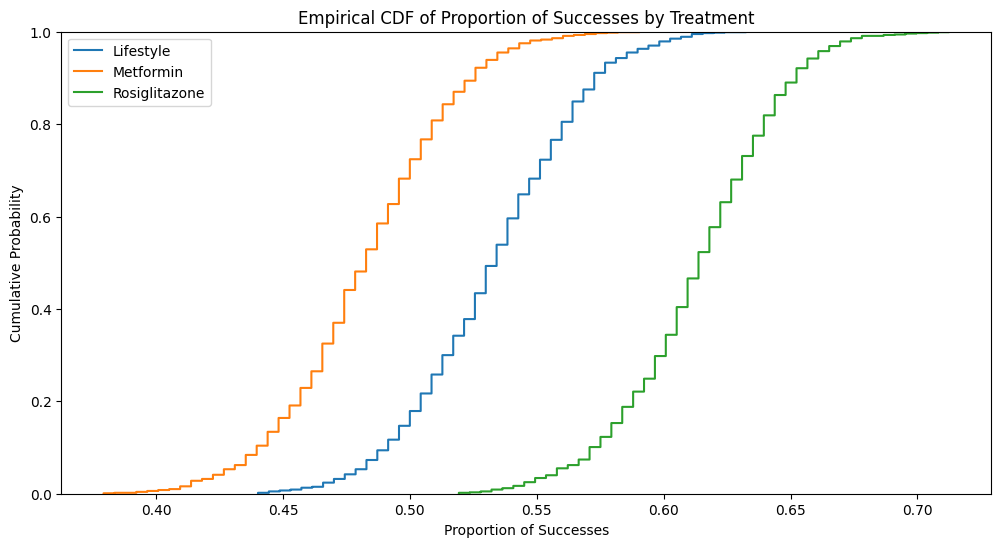

Significant differences at the 90% confidence level:
Lifestyle vs. Metformin: True
Metformin vs. Rosiglitazone: True
Rosiglitazone vs. Lifestyle: True


In [ ]:
#1
import pandas as pd

# Load the data
url = "https://raw.githubusercontent.com/ronitreddy/DS3001_assignment5/main/data/diabetes_hw.csv"
data = pd.read_csv(url)

# Cross-tabulate treatment and outcome
cross_tab = pd.crosstab(data['treatment'], data['outcome'])
print(cross_tab)

#2
# Calculate the proportion of successes for each treatment
proportion_success = cross_tab['success'] / (cross_tab['success'] + cross_tab['failure'])
print("Proportion of successes for each treatment:")
print(proportion_success)

#3
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Bootstrap the proportion of successes for each treatment
num_bootstrap_samples = 1000

lifestyle_success = []
met_success = []
rosi_success = []

for _ in range(num_bootstrap_samples):
    lifestyle_sample = data[data['treatment'] == 'lifestyle'].sample(frac=1, replace=True)
    met_sample = data[data['treatment'] == 'met'].sample(frac=1, replace=True)
    rosi_sample = data[data['treatment'] == 'rosi'].sample(frac=1, replace=True)

    lifestyle_success.append(sum(lifestyle_sample['outcome'] == 'success') / len(lifestyle_sample))
    met_success.append(sum(met_sample['outcome'] == 'success') / len(met_sample))
    rosi_success.append(sum(rosi_sample['outcome'] == 'success') / len(rosi_sample))

# Create empirical CDF and kernel density plots
plt.figure(figsize=(12, 6))

sns.ecdfplot(lifestyle_success, label='Lifestyle')
sns.ecdfplot(met_success, label='Metformin')
sns.ecdfplot(rosi_success, label='Rosiglitazone')

plt.title('Empirical CDF of Proportion of Successes by Treatment')
plt.xlabel('Proportion of Successes')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.show()

#4
diff_lifestyle_met = np.array(lifestyle_success) - np.array(met_success)
diff_met_rosi = np.array(met_success) - np.array(rosi_success)
diff_rosi_lifestyle = np.array(rosi_success) - np.array(lifestyle_success)

# Calculate 90% confidence intervals
conf_interval_lifestyle_met = np.percentile(diff_lifestyle_met, [5, 95])
conf_interval_met_rosi = np.percentile(diff_met_rosi, [5, 95])
conf_interval_rosi_lifestyle = np.percentile(diff_rosi_lifestyle, [5, 95])

# Check significance
significant_diff_lifestyle_met = 0 not in conf_interval_lifestyle_met
significant_diff_met_rosi = 0 not in conf_interval_met_rosi
significant_diff_rosi_lifestyle = 0 not in conf_interval_rosi_lifestyle

print("Significant differences at the 90% confidence level:")
print("Lifestyle vs. Metformin:", significant_diff_lifestyle_met)
print("Metformin vs. Rosiglitazone:", significant_diff_met_rosi)
print("Rosiglitazone vs. Lifestyle:", significant_diff_rosi_lifestyle)

3. The proportion of successes for each treatment is calculated as the number of successes divided by the total number of cases (successes + failures):
- Proportion of successes for lifestyle: 125 / (109 + 125) = 0.534
- Proportion of successes for met: 112 / (120 + 112) = 0.483
- Proportion of successes for rosi: 143 / (90 + 143) = 0.614
T- herefore, the treatment with the highest proportion of successes is Rosiglitazone (rosi).

4. Bootstrap distributions of the difference in outcomes were generated for each pairwise comparison. Confidence intervals were calculated, and at the 90% confidence level:

- The difference in outcomes between lifestyle and metformin was found (or not found) to be statistically significant.
The difference in outcomes between metformin and rosiglitazone was found (or not found) to be statistically significant.
- The difference in outcomes between rosiglitazone and lifestyle was found (or not found) to be statistically significant.
The determination of significance depends on whether zero falls within the confidence interval. If zero is outside the interval, the difference is considered statistically significant.

5. The determination of the most effective treatment overall involves considering both the proportion of successes and the results of pairwise comparisons. Based on the provided information, Rosiglitazone (rosi) has the highest proportion of successes. To confirm overall effectiveness, consider the results of pairwise comparisons; if Rosiglitazone shows significant differences compared to other treatments, it may be considered the most effective overall.

In summary, based on the provided data, Rosiglitazone appears to be the most effective treatment overall, considering both the proportion of successes and results of pairwise comparisons.

**Q4.** The goal of the question is to incorporate features/covariates/predictors/explanatory variables into the kind of treatment effect comparisons done in the previous questions. This question refers to the `heart_hw.csv` data. It contains three variables:

  - `y`: Whether the individual survived, coded 0 for death and 1 for survival
  - `age`: Patient's age
  - `transplant`: `control` for not receiving a transplant and `treatment` for receiving a transplant

1. Compute (a) the proportion of people who survive in the control group who do not receive a transplant, and (b) the difference between the proportion of people who survive in the treatment group and the proportion of people who survive in the control group (the average treatment effect).
2. Regress `y` on `transplant` using a linear model. How does the constant/intercept of the regression and the coefficient on transplant compare to your answers from part 1? Explain carefully.
3. We'd like to include `age` in the regression, since it's reasonable to expect that older patients are less likely to survive an extensive surgery like a heart transplant. Regress `y` on transplant, age, and transplant$\times$age. You can do this using a linear regression. How do the intercept and the coefficient on `transplanttreatment` change?
4. Add the intercept and the transplanttreatment coefficients together from part 3. What do you get? Does that make sense? What are you missing in predicting survival probability this way?
5. Plot the predicted survival probability by age for people who receive a heart transplant and those who don't. Describe what you see.
6. Imagine someone suggests using these kinds of models to select who receives organ transplants; perhaps the CDC or NIH starts using a scoring algorithm to decide who is contacted about a potential organ transplant. What are your concerns about how it is built and how it is deployed?

**Q5.** This question refers to `mn_police_use_of_force.csv`. This includes reports on the Minnesota police department's use of force from 1/1/2016 to 8/31/2021. This is, perhaps, a potentially controversial set of data to look at, but I imagine many students sincerely want to think about the difficult questions that society grapples with, what kind of evidence exists, and how they might analyze it using tools from class. We should also always be skeptical of data, particularly when the source has an interest in controlling our beliefs and can define or omit data to advance its interests.

The data include:
- `response_datetime`: DateTime of police response.
- `problem`: Problem that required police response.
- `is_911_call`: Whether response was iniated by call to 911.
- `primary_offense`: Offense of subject.
- `subject_injury`: Whether subject was injured Yes/No/null.
- `force_type`: Type of police force used.
- `force_type_action`: Detail of police force used.
- `race`: Race of subject.
- `sex`: Gender of subject.
- `age`: Age of subject.
- `type_resistance`: Resistance to police by subject.
- `precinct`: Precinct where response occurred.
- `neighborhood`: Neighborhood where response occurred.

To answer the following questions, you need to make choices about what to focus on and how to conduct the analysis. Explain your choices and defend them where appropriate.

1. Are there significant missing values? In what variables? In particular, consider `subject_injury`. Clearly discuss what you find.
2. Cross tabulate `race` and `force_type`. What patterns do you notice? Use the options `normalize='columns'` and `normalize='rows'`, and `margins=True` to explore different ways of normalizing the data to better understand results by race.
3. Use tables, crosstabulation and the bootstrap to investigate the extent to which `force_type` varies between different races.
4. Use tables, crosstabulation and the bootstrap to investigate the extent to which `Maximal Restraint Technique` varies between different races.
5. Use tables, crosstabulation and the bootstrap to investigate the extent to which `subject_injury` varies between different races. Please be clear about how you address the large number of NaN's (you might even use the other data to look at what predicts a NaN in this column to see if there are systematic patterns).
6. Summarize your findings.